# 1. Import lib and Data

In [1]:
import os
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

os.listdir()

['Liga_HW.ipynb']

Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными. 
DataFrame должен состоять из 10000 строк и 5 колонок.

Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:
- 1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: "1234567890abcdefghijk". Для каждой строки в DataFrame значение user_id формируются случайным образом.

- 2-я колонка – order_number – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от 1 до 10.

- 3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения со средним 1440 и стандартным отклонением 200.

- 4-я колонка – order_items_sum – общая стоимость заказа. Значения для этого столбца необходимо взять из экспоненциального распределения с параметром λ = 1, смещённого на +1. 

- 5-я колонка – retention – день жизни покупателя, в который он совершил заказ. Необходимо сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.

В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из них.

In [2]:
letters = '1234567890abcdefghijk'
def generate1(N):
    rand_string = []
    while len(rand_string)!=10000:
        i = ''.join(random.choice(letters) for i in range(15))
        if i not in rand_string:
          rand_string.append(i)
    return rand_string

def generate2(N):
    return [ random.randint(0,10) for i in range(N) ]

def generate3(N):
    return [ random.normalvariate(mu=1440, sigma=200) for i in range(N) ]

def generate4(N):
    return [ random.expovariate(lambd=1)+1 for i in range(N) ]

values=[1, 2, 3, 4, 5]
weights = [0.35, 0.25, 0.2, 0.15, 0.05]
def generate5(N):
    return random.choices(values, weights, k=N)

In [3]:
N=10000

df1 = pd.DataFrame([])

df1['user_id'] = generate1(N)
df1['order_number'] = generate2(N)
df1['click2delivery'] = generate3(N)
df1['order_items_sum'] = generate4(N)
df1['retention'] = generate5(N)

df1

,user_id,order_number,click2delivery,order_items_sum,retention
0,3ga16a9ciec0a1h,5,1041.149438,1.159823,4
1,hc1a287d0d0fa67,9,1287.568398,2.496369,4
2,0fg7k8fa8a8jdi3,10,1206.791906,1.959994,1
3,12h3f6026244fgb,6,1431.213863,1.603571,1
4,a4dhe5a97b5jf54,8,1409.635750,2.245301,1
...,...,...,...,...,...
9995,h4jfi6f808kae69,9,1546.903510,4.391244,4
9996,ce86kgadidh11i9,6,1278.487005,2.982592,1
9997,caiha868e3f03jf,5,1670.968649,1.299106,2
9998,db3ichj0a596i4j,7,1671.636529,5.493661,1


# Задача 1.
- Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

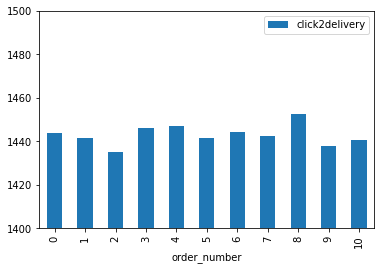

,click2delivery
order_number,
0,1443.692265
1,1441.341671
2,1435.224348
3,1445.987426
4,1446.950811
5,1441.308802
6,1444.144949
7,1442.395659
8,1452.543288


In [4]:
df_result = df1.groupby(['order_number'])[['click2delivery']].mean()

df_result.plot.bar()
plt.ylim([1400, 1500])
plt.show()

df_result

# Задача 2.
- 2. Отдельной колонкой добавить значения последовательности, начинающейся с 0,1, где каждый следующий элемент является суммой двух предыдущих, умноженных на 0.5

In [5]:
N = df_result.shape[0]

def task2(N):
  
  list_return = []

  for i in range(N):
    if i==0:
      new_value = 0.1
    elif i==1:
      new_value = 0.5 * ((0.1)+(0))
    else:
      new_value = 0.5 * ((list_return[i-2])+(list_return[i-1]))
    list_return.append(new_value)
  
  return list_return

df_result['task2'] = task2(N)
df_result

,click2delivery,task2
order_number,,
0,1443.692265,0.100000
1,1441.341671,0.050000
2,1435.224348,0.075000
3,1445.987426,0.062500
4,1446.950811,0.068750
5,1441.308802,0.065625
6,1444.144949,0.067188
7,1442.395659,0.066406
8,1452.543288,0.066797


# Задача 3.
- Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в user_id, затем квадрат числа, полученного из всех цифр в user_id в той последовательности, в которой они встречаются в user_id.

In [6]:
import re

def task3(user_id):
  val_str = ''.join(
                     re.findall( '[A-Za-z]+',user_id ) 
                  )
  val_int = str(
          (
            int(
                 '0' + ''.join(
                                re.findall( '[0-9]',user_id ) 
                              ) 
              )
          )^2 
       )
  
  return val_str+val_int

df1['user_id'].map(lambda x: task3(x) )

0       gaaciecah316903
1       hcaddfa12870065
2        fgkfaajdi78881
3       hffgb1236026246
4       adheabjf4597552
             ...       
9995    hjfifkae4680871
9996    cekgadidhi86117
9997    caihaefjf868301
9998    dbichjaij305966
9999    ccfkdjhfehf3241
Name: user_id, Length: 10000, dtype: object

# Задача 4.
- Добавь результат применения этой функции к user_id в новый столбец. Использование циклов вне функции запрещено.

In [7]:
df1['task4'] = df1['user_id'].map(lambda x: task3(x) )
df1

,user_id,order_number,click2delivery,order_items_sum,retention,task4
0,3ga16a9ciec0a1h,5,1041.149438,1.159823,4,gaaciecah316903
1,hc1a287d0d0fa67,9,1287.568398,2.496369,4,hcaddfa12870065
2,0fg7k8fa8a8jdi3,10,1206.791906,1.959994,1,fgkfaajdi78881
3,12h3f6026244fgb,6,1431.213863,1.603571,1,hffgb1236026246
4,a4dhe5a97b5jf54,8,1409.635750,2.245301,1,adheabjf4597552
...,...,...,...,...,...,...
9995,h4jfi6f808kae69,9,1546.903510,4.391244,4,hjfifkae4680871
9996,ce86kgadidh11i9,6,1278.487005,2.982592,1,cekgadidhi86117
9997,caiha868e3f03jf,5,1670.968649,1.299106,2,caihaefjf868301
9998,db3ichj0a596i4j,7,1671.636529,5.493661,1,dbichjaij305966


# Задача 5.
- Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов click2delivery, order_items_sum и retention. Построй гистограммы распределения значений в столбцах

In [8]:
df_res = pd.DataFrame([])

for col in ['click2delivery', 'order_items_sum', 'retention']:
  res = {}
  for j in ['mode', 'median', 'mean', 'var', 'std']:
    # Мод может быть несколько, берем единственное
    if j=='mode':
      res[j] = df1[col].mode()[0]
    else:
      res[j] = df1[col].agg(j)
  df_res = df_res.append( pd.DataFrame.from_dict(res,orient='index').T )

df_res = pd.DataFrame( ['click2delivery', 'order_items_sum', 'retention'] ).join( df_res.reset_index(drop=True) )
df_res.columns = [str(x).replace('0','columns') for x in df_res.columns]
df_res

,columns,mode,median,mean,var,std
0,click2delivery,594.222030,1441.316205,1442.982335,40316.879876,200.790637
1,order_items_sum,1.000093,1.669462,1.970430,0.956850,0.978187
2,retention,1.000000,2.000000,2.287700,1.495478,1.222897


# Задача 6.
- Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. Обоснуй, почему ты так считаешь?

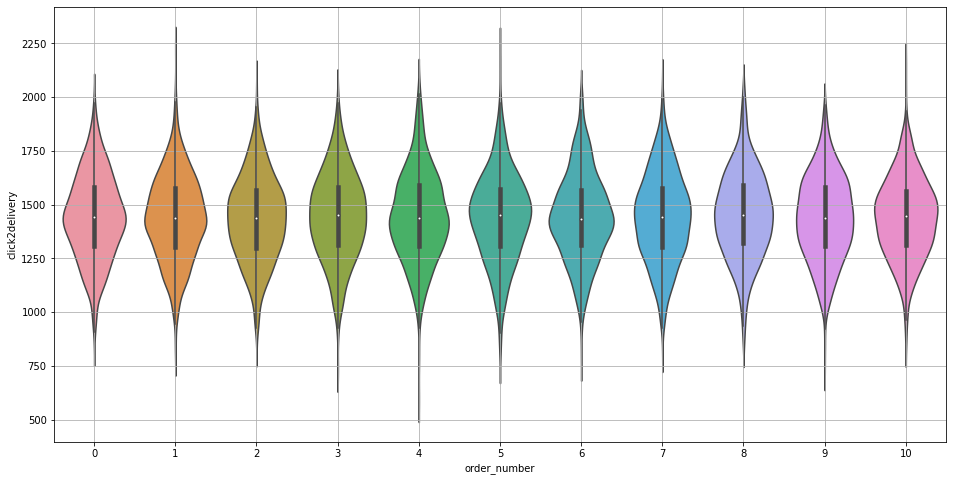

In [9]:
# Нам нужно увидеть распределение количества заказов во времени и по номеру, поэтому такое:
plt.figure( figsize = (16,8) )
sns.violinplot( data=df1
               , x="order_number"
               , y="click2delivery"
               )
plt.grid()
plt.show()